In [1]:
import numpy as np
import pandas as pd
import os
import pyeeg
from scipy import stats

default_path = "C:/Users/cjy89/Desktop/EEG/capstone"
labels = ["HA_HV", "HA_LV", "LA_HV", "LA_LV"]
features = ["time_feature", "frequency_feature"]

index_channel = ["FP1", "AF3", "F3", "F7", "FC5", "FC1", "C3", "T7", "CP5", "CP1", "P3", "P7",
                 "PO3", "O1", "Oz", "Pz", "FP2", "AF4", "Fz", "F4", "F8", "FC6", "FC2", "Cz",
                 "C4", "T8", "CP6", "CP2", "P4", "P8", "PO4", "O2"]
basic_channel = ["F3", "F4", "F7", "F8", "FC1", "FC2", "FC5", "FC6", "FP1", "FP2", "AF3", "AF4"]

# Valence Model
important feature, dfa의 KDE계산

In [2]:
high_dfa = pd.DataFrame([])
low_dfa = pd.DataFrame([])

for label in labels:
    print(label, end=" ")
    
    if label[:2] == "HA":
        csv_files = os.listdir(f"./capstone/{label}/deap_eeg2/")
        for csv_file in csv_files:
            eeg_file = pd.read_csv(f"./capstone/{label}/deap_eeg2/{csv_file}", header=None)
            eeg_file.index = index_channel
            eeg_file = eeg_file.loc[basic_channel, 128 * 3:]
            high_dfa = pd.concat([high_dfa, eeg_file.apply(lambda x: pyeeg.dfa(x), axis=1)], axis=1)
            
    elif label[:2] == "LA":        
        csv_files = os.listdir(f"./capstone/{label}/deap_eeg2/")
        for csv_file in csv_files:
            eeg_file = pd.read_csv(f"./capstone/{label}/deap_eeg2/{csv_file}", header=None)
            eeg_file.index = index_channel
            eeg_file = eeg_file.loc[basic_channel, 128 * 3:]
            low_dfa = pd.concat([low_dfa, eeg_file.apply(lambda x: pyeeg.dfa(x), axis=1)], axis=1)
            
    print(".... Done!")

HA_HV 

C:\Users\cjy89\anaconda3\lib\site-packages\pyeeg-0.4.4-py3.8.egg\pyeeg\detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\cjy89\anaconda3\lib\site-packages\pyeeg-0.4.4-py3.8.egg\pyeeg\detrended_fluctuation_analysis.py:129: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


.... Done!
HA_LV .... Done!
LA_HV .... Done!
LA_LV .... Done!


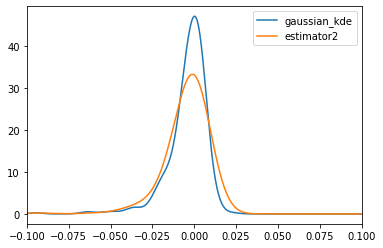

In [77]:
X = np.linspace(-0.3, 0.1, 2000)

estimator1 = stats.gaussian_kde(high_dfa.mean(axis=0), bw_method='silverman')
estimator2 = stats.gaussian_kde(low_dfa.mean(axis=0), bw_method='silverman')

K1 = estimator1(X)
K2 = estimator2(X)

## 4. 그래프 그리기
plt.plot(X, K1, label='gaussian_kde')
plt.plot(X, K2, label='estimator2')
plt.xlim([-0.1, 0.1])
plt.legend(loc='best')
plt.show()

In [78]:
high_dfa.to_csv("high_dfa.csv", header=False, index=False)
low_dfa.to_csv("low_dfa.csv", header=False, index=False)

# Arousal Model
important feature, kurtosis의 KDE계산

In [53]:
high_kurtosis = pd.DataFrame([])
low_kurtosis = pd.DataFrame([])

for label in labels:
    print(label, end=" ")
    
    if label[:2] == "HA":
        csv_files = os.listdir(f"./capstone/{label}/deap_eeg2/")
        for csv_file in csv_files:
            eeg_file = pd.read_csv(f"./capstone/{label}/deap_eeg2/{csv_file}", header=None)
            eeg_file.index = index_channel
            eeg_file = eeg_file.loc[basic_channel, 128 * 3:]
            high_kurtosis = pd.concat([high_kurtosis, pd.Series(stats.kurtosis(eeg_file, axis=1))], axis=1)
            
    elif label[:2] == "LA":        
        csv_files = os.listdir(f"./capstone/{label}/deap_eeg2/")
        for csv_file in csv_files:
            eeg_file = pd.read_csv(f"./capstone/{label}/deap_eeg2/{csv_file}", header=None)
            eeg_file.index = index_channel
            eeg_file = eeg_file.loc[basic_channel, 128 * 3:]
            low_kurtosis = pd.concat([low_kurtosis, pd.Series(stats.kurtosis(eeg_file, axis=1))], axis=1)
            
    print(".... Done!")

HA_HV .... Done!
HA_LV .... Done!
LA_HV .... Done!
LA_LV .... Done!


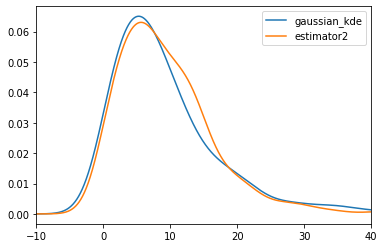

In [80]:
X = np.linspace(-20, 100, 5000)

estimator1 = stats.gaussian_kde(high_kurtosis.mean(axis=0), bw_method='silverman')
estimator2 = stats.gaussian_kde(low_kurtosis.mean(axis=0), bw_method='silverman')

K1 = estimator1(X)
K2 = estimator2(X)

## 4. 그래프 그리기
plt.plot(X, K1, label='gaussian_kde')
plt.plot(X, K2, label='estimator2')
plt.legend(loc='best')
plt.xlim([-10, 40])
plt.show()

In [81]:
high_kurtosis.to_csv("high_kurtosis.csv", header=False, index=False)
low_kurtosis.to_csv("low_kurtosis.csv", header=False, index=False)